**Problema** 1-7

Para una mezcla binaria, de componentes 1 y 2, la ecuación del virial truncada en el segundo coeficiente da lugar a la siguiente expresión:

$$\ln \varphi_1 = \frac{B_{11}+x_2^2\Delta_{12}}{RT}p $$

Donde $\Delta_{12}= 2B_{12}-B_{11}-B_{22}$.


Considerando una mezcla entre CO$_2$ (1) y O$_2$ (2) a $333$ K y $50$ bar:

a) Calcule la fugacidad de ambos componentes en una mezcla con $x_{2} = 0,40$. ¿Cuánto difieren porcentualmente de las correspondientes presiones parciales?¿Es correcto afirmar que la fugacidad es una presión corregida? Discuta brevemente.

b) Grafique el $\ln \varphi_2$ en función de la fracción molar de $x_2$. Interprete por qué cambia el signo del $\ln \varphi_2$ e indique a qué fracción molar sucede el cambio de signo. ¿Es posible este cambio de signo para el  $\ln \varphi_1$?

c) ¿A partir de qué presión la desviación de la idealidad del potencial químico de 1 es mayor a $1$ kcal mol$^{-1}$ en una mezcla equimolar a $333$ K?

Datos para una mezcla de CO$_2$ (1) y O$_2$ (2):

$B_{11} =-119,2$ cm${^3}$ mol$^{-1}$ \\
$B_{22} =-14,7$ cm${^3}$ mol$^{-1}$ \\
$B_{12} =-36,8$ cm${^3}$ mol$^{-1}$ \\


**Resolución:**

La idea de este ejercicio es aprovechar algunas de las herramientas que la programación pone a nuestra disposición para la resolución de problemas de química física. Se trata de un ejemplo relativamente sencillo en el que nuestro código nos permitirá entender un poco el comportamiento de las ecuaciones y su dependencia con los distintos parámetros, de una manera gráfica y, confiamos, más tangible que con una calculadora.

Comenzaremos por **importar** algunas **bibliotecas** que nos permitirán realizar operaciones matemáticas y gráficar.

Numpy (https://numpy.org/) es una de las librerías más poderosas de python, y sus alcances van mucho más allá de lo que utilizaremos en este ejercicio. Nos permite realizar diversas operaciones matemáticas con **arrays** (matrices), leer y escribir archivos .csv, entre otras cosas.

Matplotlib (https://matplotlib.org/) es una librería que permite generar gráficos (y animaciones), y en particular **pyplot** es un subconjunto de funciones de ella que permite generar gráficos de forma particularmente simple.

Para importar numpy y pyplot, ejecutamos:

In [1]:
import numpy as np # importo bibl...
import matplotlib.pyplot as plt

El siguiente paso es cargar nuestras los valores de nuestros parámetrosen el programa. Esto puede realizarse de varias maneras (por ejemplo, podríamos leerlos de un archivo aparte), pero para mantener el código simple, procederemos a asignar los valores de los parámetros a variables dentro del mismo código: 

In [2]:
R = 0.08314 # bar.dm3/Kmol
B11 = -119.2 # cm3/mol
B22 = -14.7 # cm3/mol
B12 = -36.8 # cm3/mol

Recordemos que en python, los **comentarios** del código comienzan con "#". Es decir, cualquier cosa que esté a la derecha de un #, será ignorado por el intérprete, y no afectará el funcionar del programa. 

En este caso pusimos las unidades como comentarios, aunque en general también se escriben comentarios que expliquen por qué hacemos determinada operación   (cuidado, no es aconsejable sobre-comentar el código).

Lo siguiente que haremos será cambiar las unidades y calcular $\Delta_{12}$:

In [ ]:
#Paso parámetros a dm3/mol y calculo el delta12
B11 = B11 /1000 
B22 = B22 /1000
B12 = B12 /1000
Delta12= 2*B12-B11-B22
print("B11=", B11,"dm3/mol")
print("B22=", B22,"dm3/mol")
print("B12=", B12,"dm3/mol")

B11= -0.1192 dm3/mol
B22= -0.0147 dm3/mol
B12= -0.0368 dm3/mol


Solo para practicar, imprimamos cuánto vale $\Delta_{12}$:
(¿Les da igual que si lo calculan con la calculadora?)

In [ ]:
print("Delta12 =", Delta12, "dm3/mol")

Delta12 = 0.0603 dm3/mol


Ahora vayamos item por item. 

**a)** Nos piden que calculemos las fugacidades de ambos componentes. Para ello, necesitamos no solo sus presiones parciales, sino también sus coeficientes de fugacidad.

Comenzaremos por definir una función que calcule $\phi_{i}$ tomando como variables $T, p, x_{j}, B_{i}$ y $\Delta_{ij}$ (con i=1 y j=2 o i=2 y j=1):

In [ ]:
def calcularPhi(R,T,p,xj,Bi,Delta12):
  return np.exp((Bi+(xj**2)*Delta12)*p/(R*T))

Notemos que la ecuación es simétrica respecto de 1 y 2, por lo que sirve tanto para calcular $\varphi_1$ como $\varphi_2$. 

In [ ]:
#Defino primero mis variables
x2=0.4
x1=1-x2
T=330 # K
p=50 # bar

#Calculo los coeficientes de fugacidad
phi1 = calcularPhi(R,T,p,x2,B11,Delta12)
phi2 = calcularPhi(R,T,p,x1,B22,Delta12)

Y ahora estamos en condiciones de calcular las fugacidades. 

**En el siguiente recuadro, calculá las fugacidades de (1) y (2) y asignalas a las variables f1 y f2 respectivamente:**

In [ ]:
#Calculo las fugacidades f1 y f2
f1=p*x1*phi1
f2=p*x2*phi2

Imprimamos los resultados:

In [ ]:
print("El coeficiente de fugacidad de 1 es",phi1)
print("El coeficiente de fugacidad de 2 es",phi2)
print("La fugacidad de 1 es ",f1)
print("La fugacidad de 2 es ",f2)

El coeficiente de fugacidad de 1 es 0.8190184733595886
El coeficiente de fugacidad de 2 es 1.0128533511852313
La fugacidad de 1 es  24.570554200787658
La fugacidad de 2 es  20.25706702370463


**b)** Ahora nos piden graficar el $\ln \varphi_2$ en función de la fracción molar de $x_2$.

Para graficar una función f(x) necesitamos dos cosas: Una lista que tenga los valores x que queremos "barrer", y otra que tenga los valores de f(x) correspondientes (en el mismo orden).

Existen múltiples maneras de resolver esto (es decir, de generar lo que necesitamos para graficar una función en un dado intervalo), pero todas tienen en común que hay que decidir cuántos puntos queremos graficar. Incluso si visualmente el gráfico luce como una línea, en el fondo se trata de puntos.

En este caso, generaremos una lista de valores de $x_{1}$ (nuestra "x") y una lista de valores de $\ln \varphi_{2}$ (nuestra "f(x)"), ambas aprovechando las virtudes de **numpy**. 

Comenzaremos por generar un **array** de numpy (que podemos pensarlo como un tipo de lista especial), invocando la función *linspace*:

In [ ]:
lista_x1=np.linspace(0, 1.0, num=101)

Esto genera un **array** de numpy unidimensional (recordemos que los arrays pueden ser multidimensionales), que tiene 101 elementos entre 0 y 1 (todos ordenados y equiespaciados).

Para "ver" qué hay en lista_x1, podemos simplemente escribir (notar que no es un "print"):

In [ ]:
lista_x1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

Lo siguiente que haremos será usar la función calcularPhi para calcular $\varphi_2$ por lo que le daremos como input el array de numpy lista_x1. Esto generará como resultado no un único valor de phi2, sino otro array de numpy, que contiene 101 elementos, cada uno de ellos correspondientes a evaluar la función calcularPhi en cada elemento de lista_x1. Luego, le tomaremos el logaritmo a cada elemento del array generado, con la función **log** de numpy.

Llamaremos este array lista_lnphi2:

In [ ]:
lista_lnphi2=np.log(calcularPhi(R,T,p,lista_x1,B22,Delta12))

Y de la misma manera, como lo que queremos es graficar en función de $x_2$, no de $x_1$, generamos lista_x2:

In [ ]:
lista_x2 = 1-lista_x1

Y con nuestras dos listas (arrays), ya podemos graficar. Acá, hay algunas sutilezas que tienen que ver con cómo funciona python. Aunque algunos detalles son difíciles de entender en primera instancia, en general desde el punto de vista operativo, graficar una lista en función de otra consta de los siguientes pasos: 
 **Importar pyplot** (esto lo hicimos al principio con "import matplotlib.pyplot as plt").
Y generar las figuras correspondientes

En resumen, todo lo anterior se condensa en el siguiente código (que es lo que en general uno copia y pega para graficar):

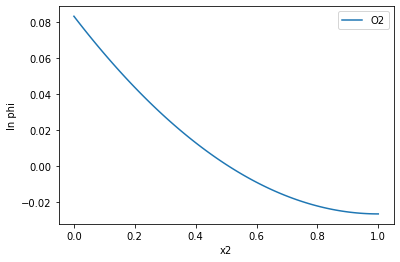

In [ ]:
plt.plot(lista_x2,lista_lnphi2,label='O2')
plt.xlabel('x2') # Rotulo de eje horizontal
plt.ylabel('ln phi') #Rotulo de eje vertical
plt.legend() #para mostrar la leyenda de cada línea graficada
plt.show() #para mostrar graficar la figura en pantalla

Observemos que $\ln \phi_{2}$ cambia de signo en aproximadamente $x_{2}\sim 0.5$. De hecho puede verificarse analíticamente que $\ln \varphi_{2}$ se anula cuando $x_{1} = \sqrt{-B_{22}/\Delta{12}}$, o bien, cuando $x_{2} = 1-\sqrt{B_{22}/\Delta{12}}$. 

Imprimamos el valor para el cual ocurre el cambio de signo:

In [ ]:
print("ln phi2 se anula cuando x2 vale", 1-np.sqrt(-B22/Delta12))

ln phi2 se anula cuando x2 vale 0.5062580688989813


¿Es posible el cambio de signo en el caso de $\varphi_{1}$? Bueno, matemáticamente sí, pero no para un $x_{1}$ con sentido fisicoquímico, pues:

In [ ]:
print("ln phi1 se anula cuando x1 vale", 1-np.sqrt(-B11/Delta12))

ln phi1 se anula cuando x1 vale -0.40598106420469127


También se lo puede ver gráficamente...

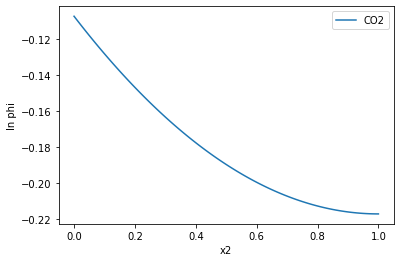

In [ ]:
lista_lnphi1=np.log(calcularPhi(R,T,p,lista_x2,B11,Delta12))
plt.plot(lista_x1,lista_lnphi1,label='CO2')
plt.xlabel('x2') # Rotulo de eje horizontal
plt.ylabel('ln phi') #Rotulo de eje vertical
plt.legend() #para mostrar la leyenda de cada línea graficada
plt.show() #para mostrar graficar la figura en pantalla

**c)** Por último, nos preguntan a partir de qué presión la desviación de la idealidad del potencial químico del  CO$_2$ es mayor a 1 kcal mol$^{-1}$ en una mezcla equimolar a $333$ K.

Antes de hacer nada, debemos notar que la desviación de la idealidad del potencial químico de 1, no es otra cosa que $RT \ln \varphi_{1}$.

De modo que buscamos $p$ tal que:

$$RT \ln \varphi_1 = \left(B_{11}+x_2^2\Delta_{12}\right)p = 1 \text{ kcal mol}^{-1} =  41,84 \text{ bar dm}^{3} $$

O bien,

$$p=\frac{41,84 \text{ bar dm}^{3}}{B_{11}+x_{2}^{2}\Delta_{12}}$$

Por lo que la presión que buscamos es:

In [ ]:
print("Para una mezcla equimolar a 333 K, la presión que verifica lo pedido para CO2 es", -41.84/(B11+(0.5**2)*Delta12), "bar")

Para una mezcla equimolar a 333 K, la presión que verifica lo pedido para CO2 es 401.82472989195685 bar


Podemos plantear lo mismo, pero para el O2, es decir, calcular la presión a la que la desviación de la idealidad del potencial químico del  O$_2$ es mayor a $1$ kcal mol$^{-1}$ en una mezcla equimolar a $333$ K.

In [ ]:
print("Para una mezcla equimolar a 333 K, la presión que verifica lo pedido para O2 es", 41.84/(B22+(0.5**2)*Delta12), "bar")

Para una mezcla equimolar a 333 K, la presión que verifica lo pedido para O2 es -111573.33333333324 bar


Aca hay que tener en cuenta que es el modulo!!

**Y con esto terminamos el ejercicio.** 


Sin embargo, algo interesante es que sin demasiado más esfuerzo podríamos estudiar la influencia de, por ejemplo, la presión, en el coeficiente de fugacidad de cada componente.

Por ejemplo para el componente 1:

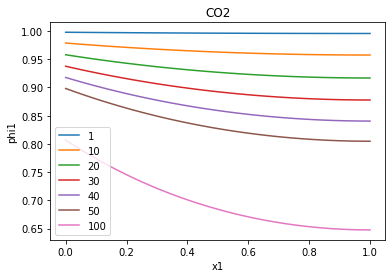

In [ ]:
plt.subplot()
lista_p = [1,10,20,30,40,50,100] #defino una lista de presiones para las cuales realizaremos el plot de lnphi1 vs x1
for p in lista_p: #recorro elementos de lista_p (a cada uno de ellos lo llamo p)
  lista_phi1 = calcularPhi(R,T,p,lista_x2,B11,Delta12)
  plt.plot(lista_x1,lista_phi1,label=p) #para cada elemento, agrego el plot en el eje ax2, con el label de la presión correspondiente en bar
plt.xlabel('x1')
plt.ylabel('phi1')
plt.title('CO2')
plt.legend()
plt.show()

Y, análogamente, para el componente 2:

AttributeError: ignored

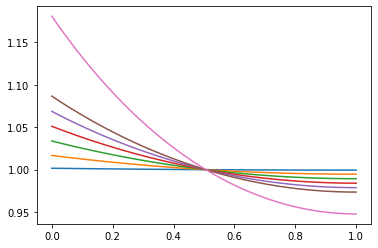

In [ ]:
for p in lista_p: 
  lista_phi2 = calcularPhi(R,T,p,lista_x1,B22,Delta12)
  plt.plot(lista_x2,lista_phi2,label=p)
plt.label('x2')
plt.ylabel('phi2')
plt.title('O2')
plt.legend()
plt.show()

Y de aquí podemos interpretar por lo menos dos cosas: Que a bajas presiones el coeficiente de fugacidad de cada componente es menos sensible a la composición, y que cuánto se desvía de la idealidad cada componente en comparación con el otro, depende de la presión.

¿Qué otro tipo de análisis realizarías?